In [1]:
'''                                  ReadMe                                                      '''
'''# Nessa célula vamos apenas mudar a função geradora do estado a ser preparado                 '''
'''# Basta alterar a função que gera o estado, nesse caso target_op = init_state_ref(n_qubits, p)'''

from src.vqa_tools import general_vqacircuit_penny 
from src.state_initializer import  init_state_ref,init_state_bpf
from src.generalize import *
from torch import tensor
from numpy import sin,cos,sqrt,outer,zeros, pi
#import cmath
from cmath import exp

def state_generalized_amplitude_damping(theta, phi, p, gamma):
    state = zeros(8,dtype=complex)    
    state[0] = sqrt(p)*cos(theta/2) # 000
    state[1] = sqrt(p*gamma)*exp(1j*phi)*sin(theta/2) # 001
    state[2] = sqrt((1-p)*(1-gamma))*cos(theta/2)#   010
    state[4] = sqrt(p*(1-gamma))*exp(1j*phi)*sin(theta/2) # 100
    state[6] = sqrt(1-p)*exp(1j*phi)*sin(theta/2) #  110
    state[7] = sqrt(1-p)*gamma*cos(theta/2) #  111
    target_op = outer(state.conj(), state)
    target_op = tensor(target_op)
    return target_op


def run_calcs(list_p, epochs):
    coerencias_R = []
    coerencias_L = []
    count = 0
    pretrain = True
    n_qubits = 3
    depht = 4
    _, params, _, _ = start_things(n_qubits, depht)
    for p in list_p:
        print(f'{count} de {len(list_p)}')
        count += 1

        circuit, _ = general_vqacircuit_penny(n_qubits, depht)

        #_, target_op = init_state_ref(n_qubits, p)
        #_, target_op = init_state_bpf(n_qubits, p)
        #target_op = state_amplitude_damping(pi/2, 0, p)
        target_op = state_generalized_amplitude_damping(pi/2, 0, p,1)

        pretrain = False
        qc, qr, params = optmize(epochs, n_qubits, circuit, params, target_op, pretrain)

        rho = tomograph(qc, qr)
        #print(rho)
        coerencias_L, coerencias_R = results(rho, coerencias_R, coerencias_L)

    plots(list_p, coerencias_R, coerencias_L)

[0.   0.25 0.5  0.75 1.  ]
0 de 5
0.2392578125
0.595703125
0.783203125
0.8154296875
0.7392578125
0.771484375
0.755859375
0.7490234375
0.740234375
0.7841796875
0.853515625
0.892578125
0.88671875
0.9052734375
0.88671875
0.8896484375
0.8857421875
0.8935546875
0.8916015625
0.90234375
0.9482421875
0.9384765625
0.94921875
0.927734375
0.943359375
0.9482421875
0.9453125
0.951171875
0.9482421875
0.94140625
0.9453125
0.9775390625
0.9755859375
0.9794921875
0.9755859375
0.970703125
0.9755859375
0.9755859375
0.9814453125
0.974609375
0.9833984375
0.978515625
0.974609375
0.9814453125
0.9765625
0.9794921875
0.984375
0.9873046875
0.984375
0.990234375
1 de 5
0.9326171875000002
0.9580078125000002
0.8613281250000002
0.8671875000000002
0.8730468750000002
0.8662109375000002
0.8710937500000002
0.8691406250000002
0.9580078125000002
0.9746093750000002
0.9619140625000002
0.9648437500000002
0.9365234375000002
0.9570312500000002
0.9521484375000002
0.9453125000000002
0.9453125000000002
0.9570312500000002
0.9511718

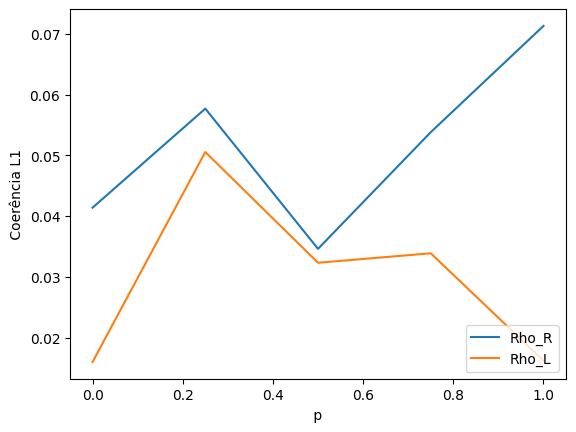

In [2]:
list_p = np.linspace(0,1,5)
print(list_p)
run_calcs(list_p, 50)